# i2b2 export analysis (v3)
Use a Baysiean classifier to try and predict venous catheter infection from patient demographics.


Using the tutorial https://www.tutorialspoint.com/artificial_intelligence_with_python/artificial_intelligence_with_python_supervised_learning_classification.htm

Because controls (N=99,791) and cases (N=708) are only 0.7% of cohort, we balance by subsetting controls to N=35k so that cases are approximately 2% of the cohort. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data

In [2]:
#declare files
#casefile = "/home/nchendri/hold-the-line/i2b2/i2b2-export_patient-central-line-infection-500_20230911-044106.csv"
#controlfile = "/home/nchendri/hold-the-line/i2b2/i2b2-export_patient-central-line-500_20230911-042706.csv"
controlfile = "/scratch/curtish/hack/i2b2/exports/v3/control/CTRLHENDRX_patient_demographics_RDALEJ_NO_PHI_65679_1.csv"
casefile = "/scratch/curtish/hack/i2b2/exports/v3/case/casehendx_patient_demographics_RDALEJ_NO_PHI_65669_1.csv"
# load data
cases = pd.read_csv(casefile)
print("cases:",cases.shape)
controls = pd.read_csv(controlfile)
print("controls:",controls.shape)
print("% cases:", cases.shape[0]/(controls.shape[0]+cases.shape[0]))

cases: (708, 19)
controls: (99791, 19)
% cases: 0.007044846217375297


# visualize data

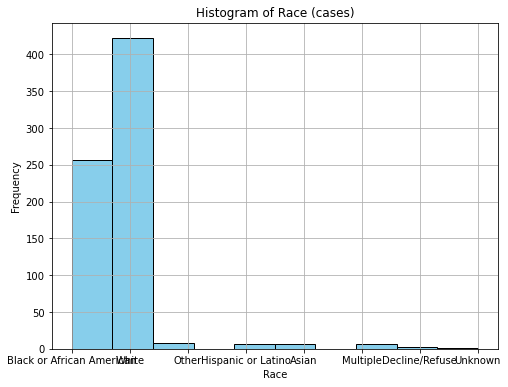

In [3]:
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(cases["RACE"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (cases)')
plt.grid(True)
plt.show()

# controls  - broken : NAN
#plt.figure(figsize=(8, 6))  # Optional: Set the figure size
#plt.hist(control["RACE"], color='skyblue', edgecolor='black')
#plt.xlabel("Race")
#plt.ylabel('Frequency')
#plt.title(f'Histogram of Race (controls)')
#plt.grid(True)
#plt.show()

# Code data for analysis 

In [4]:
whitecase = cases["RACE"].value_counts()['White']
blackcase = cases["RACE"].value_counts()['Black or African American']
whitecontrol = controls["RACE"].value_counts()['White']
blackcontrol = controls["RACE"].value_counts()['Black or African American']

In [5]:
from scipy.stats import chi2_contingency
 
# defining the table
data = [[whitecase, blackcase], [whitecontrol, blackcontrol]]

#            white        black
# Case     casewhite    caseblack
#control   whitecontrol blackcontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.007715333093625749
Dependent (reject H0)


In [6]:
mancase = cases["GENDER"].value_counts()['M']
womancase = cases["GENDER"].value_counts()['F']
mancontrol = controls["GENDER"].value_counts()['M']
womancontrol = controls["GENDER"].value_counts()['F']

In [7]:
# defining the table
data = [[mancase, womancase], [mancontrol, womancontrol]]

#            man          woman
# Case     mancase      womancase
#control   mancontrol   womancontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.4759635602224913
Independent (H0 holds true)


In [8]:
cases[1:5]

,MASTER_REQUEST_ID,QUERY_NAME,DE_ID,BIRTH_DATE,GENDER,STATE,ZIP,COUNTRY,CITY,COUNTY,MARITAL_STATUS,RACE,ETHNIC_GROUP,LANGUAGE,RELIGION,LIVING_WILL,DECEASED,DECEASED_DATE,CURRENT_AGE
1,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3929980373,09/10/1953 12:00:00 AM,M,AL,36027,US,EUFAULA,Barbour,Married,Black or African American,Non-Hispanic/Latino,English,Baptist,Unknown,NaN,NaN,70.0
2,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3928658953,11/01/1991 12:00:00 AM,F,AL,35214,US,BIRMINGHAM,Jefferson,Single,Black or African American,Non-Hispanic/Latino,English,None,Unknown,NaN,NaN,31.0
3,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3923618228,12/20/1949 12:00:00 AM,M,AL,35226,US,BIRMINGHAM,Jefferson,Married,White,Non-Hispanic/Latino,English,Catholic,Power of Attorney,NaN,NaN,73.0
4,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3928772116,09/08/1961 12:00:00 AM,F,AL,36732,US,DEMOPOLIS,Marengo,Married,White,Non-Hispanic/Latino,English,Methodist,Both,Y,12/12/2014 12:00:00 AM,NaN


In [9]:
print(
    cases["MARITAL_STATUS"].value_counts()['Single'], ' ',
    cases["MARITAL_STATUS"].value_counts()['Married'], ' ',
    cases["MARITAL_STATUS"].value_counts()['Separated'], ' ', 
    cases["MARITAL_STATUS"].value_counts()['Divorced'], ' ', 
    cases["MARITAL_STATUS"].value_counts()['Unknown'])

240   330   13   77   8


In [10]:
print(controls["MARITAL_STATUS"].value_counts()['Single'], ' ',
      controls["MARITAL_STATUS"].value_counts()['Married'], ' ',
      controls["MARITAL_STATUS"].value_counts()['Separated'], ' ', 
      controls["MARITAL_STATUS"].value_counts()['Divorced'])

31601   44470   1565   9672


In [11]:
# defining the table
data = [[cases["MARITAL_STATUS"].value_counts()['Single'], 
         cases["MARITAL_STATUS"].value_counts()['Married'],
         cases["MARITAL_STATUS"].value_counts()['Separated'] + cases["MARITAL_STATUS"].value_counts()['Divorced']
        ],
        [controls["MARITAL_STATUS"].value_counts()['Single'], 
         controls["MARITAL_STATUS"].value_counts()['Married'], 
         controls["MARITAL_STATUS"].value_counts()['Separated'] + controls["MARITAL_STATUS"].value_counts()['Divorced']
        ]
       ]


#            man          woman
# Case     mancase      womancase
#control   mancontrol   womancontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.8122555749499025
Independent (H0 holds true)


# ML ATTEMPTS

In [12]:

# merge and subset controls to 7k
#
# Add TARGET column
# 
caseSick = cases.copy()
caseSick["SICK"] = 1
print("caseSick",caseSick.shape)
controlSick = controls[1:70000].copy()
controlSick["SICK"] = 0
print("controlSick", controlSick.shape)
caseControlSick =pd.concat([caseSick, controlSick])

print("caseControlSick",caseControlSick.shape)

caseSick (708, 20)
controlSick (69999, 20)
caseControlSick (70707, 20)


## Clean data  - remove NaNs

In [13]:
#
# remove NANs
#
goodRows = np.logical_not(
    # bad rows
    np.logical_or(
        np.logical_or(
            caseControlSick["MARITAL_STATUS"].isna(),
            caseControlSick["GENDER"].isna()
        ),
        np.logical_or(
            caseControlSick["RACE"].isna(),
            caseControlSick["ZIP"].isna()
        )
    )
)
print("GoodRows:",sum(goodRows))
 # clean
caseControlSickOk=caseControlSick.loc[goodRows]
print("removed ",caseControlSick.shape[0]-caseControlSickOk.shape[0])
print("caseControlSickOk", caseControlSickOk.shape)
#
# double check
# 
print("NaN scan:")
for f in caseControlSickOk.columns:
    print("\t",f,":",sum(caseControlSickOk[f].isna()))

GoodRows: 70665
removed  42
caseControlSickOk (70665, 20)
NaN scan:
	 MASTER_REQUEST_ID : 0
	 QUERY_NAME : 0
	 DE_ID : 0
	 BIRTH_DATE : 1
	 GENDER : 0
	 STATE : 0
	 ZIP : 0
	 COUNTRY : 0
	 CITY : 2
	 COUNTY : 666
	 MARITAL_STATUS : 0
	 RACE : 0
	 ETHNIC_GROUP : 2393
	 LANGUAGE : 1
	 RELIGION : 13
	 LIVING_WILL : 901
	 DECEASED : 51817
	 DECEASED_DATE : 51901
	 CURRENT_AGE : 18764
	 SICK : 0


## convert to categorical data


In [14]:

# convert categorical to numeric
#

# code race
blackRows = caseControlSickOk["RACE"]=="Black or African American"
caseControlSickOk.loc[blackRows,"RACE_FEATURE"]=1
whiteRows = caseControlSickOk["RACE"]=="White"
caseControlSickOk.loc[whiteRows,"RACE_FEATURE"]=0
# code gender
maleRows = caseControlSickOk["GENDER"]=="M"
caseControlSickOk.loc[maleRows,"GENDER_FEATURE"]=0
femaleRows = caseControlSickOk["GENDER"]=="F"
caseControlSickOk.loc[femaleRows,"GENDER_FEATURE"]=1

# remove other races and genders
codedRows=np.logical_and(np.logical_or(blackRows,whiteRows),np.logical_or(maleRows,femaleRows))
print("caseControlSickOk", caseControlSickOk.shape)
print("size",codedRows.size)
print("sum",sum(codedRows))
print("sums race",sum(whiteRows), sum(blackRows), sum(whiteRows)+sum(blackRows), 
     sum(np.logical_or(whiteRows,blackRows)))
print("sums gender",sum(maleRows), sum(femaleRows), sum(maleRows)+sum(femaleRows), 
     sum(np.logical_or(maleRows,femaleRows)))

caseControlSickOKCoded=caseControlSickOk.loc[codedRows]
print("caseControlSickOKCoded",caseControlSickOKCoded.shape)


caseControlSickOk (70665, 22)
size 70665
sum 65959
sums race 44269 21690 65959 65959
sums gender 37462 33202 70664 70664
caseControlSickOKCoded (65959, 22)


/scratch/local/ipykernel_89452/2370364576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caseControlSickOk.loc[blackRows,"RACE_FEATURE"]=1
/scratch/local/ipykernel_89452/2370364576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caseControlSickOk.loc[maleRows,"GENDER_FEATURE"]=0


In [15]:
#
# convert MARITAL_STATUS to mulitple (boolean) features
#
x =pd.get_dummies(caseControlSickOKCoded, 
                             columns=["MARITAL_STATUS"], 
                             drop_first=True)

# remove columns we don't want


x = x[["RACE_FEATURE","GENDER_FEATURE","ZIP", 'MARITAL_STATUS_Life Partner', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Separated', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_Unknown', 'MARITAL_STATUS_Widowed',
                 "SICK"]]


print("x.names:",x.columns.tolist())

x.names: ['RACE_FEATURE', 'GENDER_FEATURE', 'ZIP', 'MARITAL_STATUS_Life Partner', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Separated', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_Unknown', 'MARITAL_STATUS_Widowed', 'SICK']


In [16]:
type(x["SICK"])

pandas.core.series.Series

## re-visualize

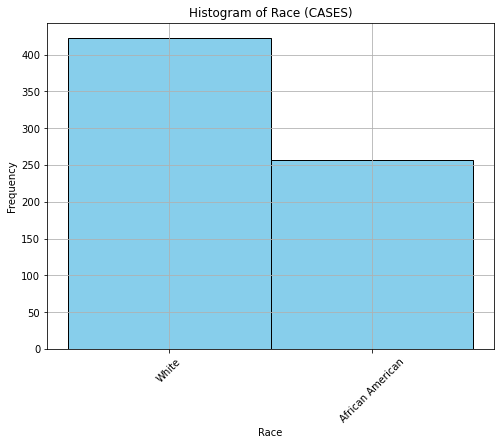

In [17]:
# cases  
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(x[x["SICK"]==1]["RACE_FEATURE"], color='skyblue', edgecolor='black', bins=2)
plt.xlabel("Race")
plt.xticks(ticks=[0.25,0.75],labels=["White","African American"], rotation=45)
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (CASES)')
plt.grid(True)
plt.show()

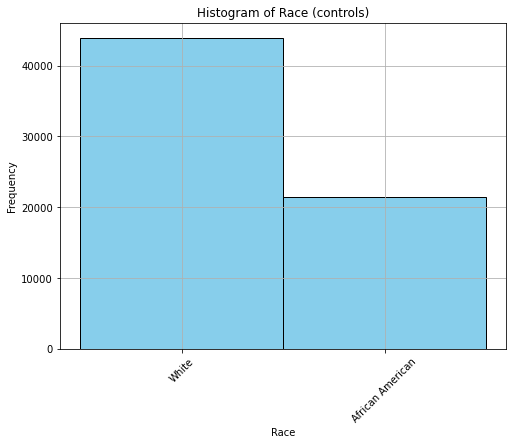

In [18]:
# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(x[x["SICK"]==0]["RACE_FEATURE"], color='skyblue', edgecolor='black', bins=2)
plt.xlabel("Race")
plt.xticks(ticks=[0.25,0.75],labels=["White","African American"], rotation=45)
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (controls)')
plt.grid(True)
plt.show()

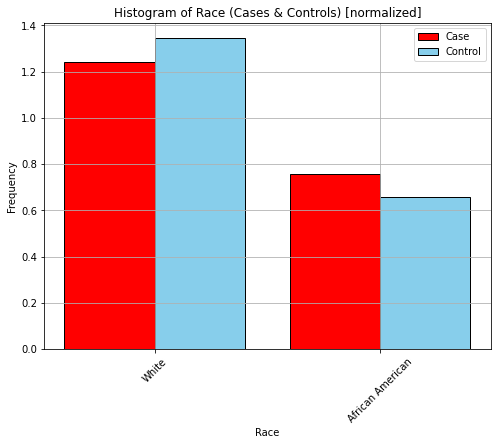

In [19]:
#
# plot both on same chart. Grrr.
#
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(
 #   [x[x["RACE_FEATURE"]==1]["SICK"],x[x["RACE_FEATURE"]==0]["SICK"]], label=["AA","CA"],
    [x[x["SICK"]==1]["RACE_FEATURE"],x[x["SICK"]==0]["RACE_FEATURE"]], label=["Case","Control"],
    color=['red','skyblue'] ,
    edgecolor='black', 
    bins=2,
     density=True
)

plt.xlabel("Race")
plt.xticks(ticks=[0.25,0.75],labels=["White","African American"], rotation=45)
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (Cases & Controls) [normalized]')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

## ML format for dataset

In [20]:
# convert our dataFrame to a numpy array of integers
feature_names=x.columns.tolist()[:-1]
print("feature_names:",feature_names)
# test on 3 rows
#x[feature_names][0:3].astype('int')
#data = np.array(x[x.columns.tolist()[:-1]][0:3].astype('int'))
data = np.array(x[feature_names].astype('int'))
data[0:3]

feature_names: ['RACE_FEATURE', 'GENDER_FEATURE', 'ZIP', 'MARITAL_STATUS_Life Partner', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Separated', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_Unknown', 'MARITAL_STATUS_Widowed']


array([[    1,     0, 36083,     0,     0,     0,     1,     0,     0],
       [    1,     0, 36027,     0,     1,     0,     0,     0,     0],
       [    1,     1, 35214,     0,     0,     0,     1,     0,     0]])

In [21]:
# build Bunch data dictionary for analysis
from sklearn.utils import Bunch

ds = Bunch(data=data,target=x["SICK"].astype('int'),feature_names=feature_names)

ds

{'data': array([[    1,     0, 36083, ...,     1,     0,     0],
        [    1,     0, 36027, ...,     0,     0,     0],
        [    1,     1, 35214, ...,     1,     0,     0],
        ...,
        [    1,     0, 35209, ...,     0,     0,     0],
        [    0,     0, 35143, ...,     0,     0,     1],
        [    1,     0, 35405, ...,     0,     0,     0]]),
 'target': 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 69995    0
 69996    0
 69997    0
 69998    0
 69999    0
 Name: SICK, Length: 65959, dtype: int64,
 'feature_names': ['RACE_FEATURE',
  'GENDER_FEATURE',
  'ZIP',
  'MARITAL_STATUS_Life Partner',
  'MARITAL_STATUS_Married',
  'MARITAL_STATUS_Separated',
  'MARITAL_STATUS_Single',
  'MARITAL_STATUS_Unknown',
  'MARITAL_STATUS_Widowed']}

In [22]:
label_names = ["Sick","Healthy"]
labels = ds['target']
feature_names = ds['feature_names']
features = ds['data']

# ML Train (GaussianNB)

In [23]:
#
# split to training and test subsets
#
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size = 0.40, 
                                                          random_state = 42)
print("train dims", train.shape)
print("test dims ", test.shape)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

print("preds len:",preds.size,"\n",
      "preds sum:",sum(preds),"\n",
      preds)

train dims (39575, 9)
test dims  (26384, 9)
preds len: 26384 
 preds sum: 180 
 [0 0 0 ... 0 0 0]


# Evaluate

In [24]:
from sklearn import metrics 
print("Accuracy score: ",metrics.accuracy_score(test_labels,preds))

Accuracy score:  0.9824514857489387


In [25]:
# confusion 
from sklearn import metrics
#print(metrics.classification_report(labels, preds))
print("I'm confused about how to apply this....")

I'm confused about how to apply this....
